In [1]:
class Dijkstra:
    def __init__(self, graph, start, goal):
        self.graph = graph  # 邻接表
        self.start = start  # 起点
        self.goal = goal  # 终点

        self.open_list = {}  # open 表
        self.closed_list = {}  # closed 表

        self.open_list[start] = 0.0  # 将起点放入 open_list 中

        self.parent = {start: None}  # 存储节点的父子关系。键为子节点，值为父节点。方便做最后路径的回溯
        self.min_dis = None  # 最短路径的长度

    def shortest_path(self):

        while True:
            if self.open_list is None:
                print('搜索失败， 结束！')
                break
            distance, min_node = min(zip(self.open_list.values(), self.open_list.keys()))  # 取出距离最小的节点
            self.open_list.pop(min_node)  # 将其从 open_list 中去除

            self.closed_list[min_node] = distance  # 将节点加入 closed_list 中

            if min_node == self.goal:  # 如果节点为终点
                self.min_dis = distance
                shortest_path = [self.goal]  # 记录从终点回溯的路径
                father_node = self.parent[self.goal]
                while father_node != self.start:
                    shortest_path.append(father_node)
                    father_node = self.parent[father_node]
                shortest_path.append(self.start)
                print(shortest_path[::-1])  # 逆序
                print('最短路径的长度为：{}'.format(self.min_dis))
                print('找到最短路径， 结束！')
                return shortest_path[::-1], self.min_dis  # 返回最短路径和最短路径长度

            for node in self.graph[min_node].keys():  # 遍历当前节点的邻接节点
                if node not in self.closed_list.keys():  # 邻接节点不在 closed_list 中
                    if node in self.open_list.keys():  # 如果节点在 open_list 中
                        if self.graph[min_node][node] + distance < self.open_list[node]:
                            self.open_list[node] = distance + self.graph[min_node][node]  # 更新节点的值
                            self.parent[node] = min_node  # 更新继承关系
                    else:  # 如果节点不在 open_list 中
                        self.open_list[node] = distance + self.graph[min_node][node]  # 计算节点的值，并加入 open_list 中
                        self.parent[node] = min_node  # 更新继承关系


if __name__ == '__main__':
    g = {'1': {'2': 2, '4': 1},
         '2': {'4': 3, '5': 11},
         '3': {'1': 4, '6': 5},
         '4': {'3': 2, '6': 8, '7': 4, '5': 2},
         '5': {'7': 6},
         '7': {'6': 1}
         }
    start = '1'
    goal = '6'
    dijk = Dijkstra(g, start, goal)
    dijk.shortest_path()


['1', '4', '7', '6']
最短路径的长度为：6.0
找到最短路径， 结束！


In [2]:
# 弗洛伊德算法
def floyd():
    n = len(graph)
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if graph[i][k] + graph[k][j] < graph[i][j]:
                    graph[i][j] = graph[i][k] + graph[k][j]
                    parents[i][j] = parents[k][j]  # 更新父结点


# 打印路径
def print_path(i, j):
    if i != j:
        print_path(i, parents[i][j])
    print(j, end='-->')


# Data [u, v, cost]
datas = [
    [0, 1, 2],
    [0, 2, 6],
    [0, 3, 4],
    [1, 2, 3],
    [2, 0, 7],
    [2, 3, 1],
    [3, 0, 5],
    [3, 2, 12],
]

n = 4

# 无穷大
inf = 9999999999

# 构图
graph = [[(lambda x: 0 if x[0] == x[1] else inf)([i, j]) for j in range(n)] for i in range(n)]
parents = [[i] * n for i in range(4)]  # 关键地方，i-->j 的父结点初始化都为i
for u, v, c in datas:
    graph[u][v] = c  # 因为是有向图，边权只赋给graph[u][v]
    #graph[v][u] = c # 如果是无向图，要加上这条。

floyd()

print('Costs:')
for row in graph:
    for e in row:
        print('∞' if e == inf else e, end='\t')
    print()

print('\nPath:')
for i in range(n):
    for j in range(n):
        print('Path({}-->{}): '.format(i, j), end='')
        print_path(i, j)
        print(' cost:', graph[i][j])

Costs:
0	2	5	4	
9	0	3	4	
6	8	0	1	
5	7	10	0	

Path:
Path(0-->0): 0--> cost: 0
Path(0-->1): 0-->1--> cost: 2
Path(0-->2): 0-->1-->2--> cost: 5
Path(0-->3): 0-->3--> cost: 4
Path(1-->0): 1-->2-->3-->0--> cost: 9
Path(1-->1): 1--> cost: 0
Path(1-->2): 1-->2--> cost: 3
Path(1-->3): 1-->2-->3--> cost: 4
Path(2-->0): 2-->3-->0--> cost: 6
Path(2-->1): 2-->3-->0-->1--> cost: 8
Path(2-->2): 2--> cost: 0
Path(2-->3): 2-->3--> cost: 1
Path(3-->0): 3-->0--> cost: 5
Path(3-->1): 3-->0-->1--> cost: 7
Path(3-->2): 3-->0-->1-->2--> cost: 10
Path(3-->3): 3--> cost: 0


In [10]:
reset

In [11]:
import math
from enum import Enum
from random import randint

import pygame

# 定义全局变量：地图中节点的像素大小
CELL_WIDTH = 16  #单元格宽度
CELL_HEIGHT = 16  #单元格长度
BORDER_WIDTH = 1  #边框宽度
BLOCK_NUM = 50  #地图中的障碍物数量


class Color(Enum):
    ''' 颜色 '''
    RED = (255, 0, 0)
    GREEN = (0, 255, 0)
    BLUE = (0, 0, 255)
    WHITE = (255, 255, 255)
    BLACK = (0, 0, 0)

    @staticmethod
    def random_color():
        '''设置随机颜色'''
        r = randint(0, 255)
        g = randint(0, 255)
        b = randint(0, 255)
        return (r, g, b)


class Map(object):
    def __init__(self, mapsize):
        self.mapsize = mapsize

    def generate_cell(self, cell_width, cell_height):
        '''
        定义一个生成器，用来生成地图中的所有节点坐标
        :param cell_width: 节点宽度
        :param cell_height: 节点长度
        :return: 返回地图中的节点
        '''
        x_cell = -cell_width
        for num_x in range(self.mapsize[0] // cell_width):
            y_cell = -cell_height
            x_cell += cell_width
            for num_y in range(self.mapsize[1] // cell_height):
                y_cell += cell_height
                yield (x_cell, y_cell)


class Node(object):
    def __init__(self, pos):
        self.pos = pos
        self.father = None
        self.gvalue = 0
        self.fvalue = 0

    def compute_fx(self, enode, father):
        if father == None:
            print('未设置当前节点的父节点！')

        gx_father = father.gvalue
        #采用欧式距离计算父节点到当前节点的距离
        gx_f2n = math.sqrt((father.pos[0] - self.pos[0]) ** 2 + (father.pos[1] - self.pos[1]) ** 2)
        gvalue = gx_f2n + gx_father

        hx_n2enode = math.sqrt((self.pos[0] - enode.pos[0]) ** 2 + (self.pos[1] - enode.pos[1]) ** 2)
        fvalue = gvalue + hx_n2enode
        return gvalue, fvalue

    def set_fx(self, enode, father):
        self.gvalue, self.fvalue = self.compute_fx(enode, father)
        self.father = father

    def update_fx(self, enode, father):
        gvalue, fvalue = self.compute_fx(enode, father)
        if fvalue < self.fvalue:
            self.gvalue, self.fvalue = gvalue, fvalue
            self.father = father


class AStar(object):
    def __init__(self, mapsize, pos_sn, pos_en):
        self.mapsize = mapsize  #表示地图的投影大小，并非屏幕上的地图像素大小
        self.openlist, self.closelist, self.blocklist = [], [], []
        self.snode = Node(pos_sn)  #用于存储路径规划的起始节点
        self.enode = Node(pos_en)  #用于存储路径规划的目标节点
        self.cnode = self.snode  #用于存储当前搜索到的节点

    def run(self):
        self.openlist.append(self.snode)
        while (len(self.openlist) > 0):
            #查找openlist中fx最小的节点
            fxlist = list(map(lambda x: x.fvalue, self.openlist))
            index_min = fxlist.index(min(fxlist))
            self.cnode = self.openlist[index_min]
            del self.openlist[index_min]
            self.closelist.append(self.cnode)

            # 扩展当前fx最小的节点，并进入下一次循环搜索
            self.extend(self.cnode)
            # 如果openlist列表为空，或者当前搜索节点为目标节点，则跳出循环
            if len(self.openlist) == 0 or self.cnode.pos == self.enode.pos:
                break

        if self.cnode.pos == self.enode.pos:
            self.enode.father = self.cnode.father
            return 1
        else:
            return -1

    def get_minroute(self):
        minroute = []
        current_node = self.enode

        while (True):
            minroute.append(current_node.pos)
            current_node = current_node.father
            if current_node.pos == self.snode.pos:
                break

        minroute.append(self.snode.pos)
        minroute.reverse()
        return minroute

    def extend(self, cnode):
        nodes_neighbor = self.get_neighbor(cnode)
        for node in nodes_neighbor:
            #判断节点node是否在closelist和blocklist中，因为closelist和blocklist中元素均为Node类，所以要用map函数转换为坐标集合
            if node.pos in list(map(lambda x: x.pos, self.closelist)) or node.pos in self.blocklist:
                continue
            else:
                if node.pos in list(map(lambda x: x.pos, self.openlist)):
                    node.update_fx(self.enode, cnode)
                else:
                    node.set_fx(self.enode, cnode)
                    self.openlist.append(node)

    def setBlock(self, blocklist):
        '''
        获取地图中的障碍物节点，并存入self.blocklist列表中
        注意：self.blocklist列表中存储的是障碍物坐标，不是Node类
        :param blocklist:
        :return:
        '''
        self.blocklist.extend(blocklist)
        # for pos in blocklist:
        #     block = Node(pos)
        #     self.blocklist.append(block)

    def get_neighbor(self, cnode):
        offsets = [(-1, 1), (0, 1), (1, 1), (-1, 0), (1, 0), (-1, -1), (0, -1), (1, -1)]
        nodes_neighbor = []
        x, y = cnode.pos[0], cnode.pos[1]
        for os in offsets:
            x_new, y_new = x + os[0], y + os[1]
            pos_new = (x_new, y_new)
            #判断是否在地图范围内,超出范围跳过
            if x_new < 0 or x_new > self.mapsize[0] - 1 or y_new < 0 or y_new > self.mapsize[1]:
                continue
            nodes_neighbor.append(Node(pos_new))

        return nodes_neighbor


def main():
    mapsize = tuple(map(int, input('请输入地图大小，以逗号隔开：').split(',')))
    pos_snode = tuple(map(int, input('请输入起点坐标，以逗号隔开：').split(',')))
    pos_enode = tuple(map(int, input('请输入终点坐标，以逗号隔开：').split(',')))
    myAstar = AStar(mapsize, pos_snode, pos_enode)
    blocklist = gen_blocks(mapsize[0], mapsize[1])
    myAstar.setBlock(blocklist)
    routelist = []  #记录搜索到的最优路径
    if myAstar.run() == 1:
        routelist = myAstar.get_minroute()
        print(routelist)
        showresult(mapsize, pos_snode, pos_enode, blocklist, routelist)
    else:
        print('路径规划失败！')


def gen_blocks(width, height):
    '''
    随机生成障碍物
    :param width: 地图宽度
    :param height: 地图高度
    :return:返回障碍物坐标集合
    '''
    i, blocklist = 0, []
    while (i < BLOCK_NUM):
        block = (randint(0, width - 1), randint(0, height - 1))
        if block not in blocklist:
            blocklist.append(block)
            i += 1

    return blocklist


def showresult(mapsize, pos_sn, pos_en, blocklist, routelist):
    # 初始化导入的Pygame模块
    pygame.init()
    # 此处要将地图投影大小转换为像素大小，此处设地图中每个单元格的大小为CELL_WIDTH*CELL_HEIGHT像素
    mymap = Map((mapsize[0] * CELL_WIDTH, mapsize[1] * CELL_HEIGHT))
    pix_sn = (pos_sn[0] * CELL_WIDTH, pos_sn[1] * CELL_HEIGHT)
    pix_en = (pos_en[0] * CELL_WIDTH, pos_en[1] * CELL_HEIGHT)
    #对blocklist和routelist中的坐标同样要转换为像素值
    bl_pix = list(map(transform, blocklist))
    rl_pix = list(map(transform, routelist))
    # 初始化显示的窗口并设置尺寸
    screen = pygame.display.set_mode(mymap.mapsize)
    # 设置窗口标题
    pygame.display.set_caption('A*算法路径搜索演示：')
    #用白色填充屏幕
    screen.fill(Color.WHITE.value)  #为什么用参数Color.WHITE不行？

    #绘制屏幕中的所有单元格
    for (x, y) in mymap.generate_cell(CELL_WIDTH, CELL_HEIGHT):
        if (x, y) in bl_pix:
            #绘制黑色的障碍物单元格，并留出2个像素的边框
            pygame.draw.rect(screen, Color.BLACK.value, (
            (x + BORDER_WIDTH, y + BORDER_WIDTH), (CELL_WIDTH - 2 * BORDER_WIDTH, CELL_HEIGHT - 2 * BORDER_WIDTH)))
        else:
            # 绘制绿色的可通行单元格，并留出2个像素的边框
            pygame.draw.rect(screen, Color.GREEN.value, (
            (x + BORDER_WIDTH, y + BORDER_WIDTH), (CELL_WIDTH - 2 * BORDER_WIDTH, CELL_HEIGHT - 2 * BORDER_WIDTH)))
    #绘制起点和终点
    pygame.draw.circle(screen, Color.BLUE.value, (pix_sn[0] + CELL_WIDTH // 2, pix_sn[1] + CELL_HEIGHT // 2),
                       CELL_WIDTH // 2 - 1)
    pygame.draw.circle(screen, Color.RED.value, (pix_en[0] + CELL_WIDTH // 2, pix_en[1] + CELL_HEIGHT // 2),
                       CELL_WIDTH // 2 - 1)

    #绘制搜索得到的最优路径
    pygame.draw.aalines(screen, Color.RED.value, False, rl_pix)
    keepGoing = True
    while keepGoing:
        pygame.time.delay(100)
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                keepGoing = False
        pygame.display.flip()


def transform(pos):
    xnew, ynew = pos[0] * CELL_WIDTH, pos[1] * CELL_HEIGHT
    return (xnew, ynew)


if __name__ == '__main__':
    main()

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19)]


: 

顶点 v1 到 顶点 v11 的最短加权路径:  [1, 2, 5, 6, 3, 7, 10, 9, 11]
顶点 v1 到 顶点 v11 的最短加权路径长度:  13


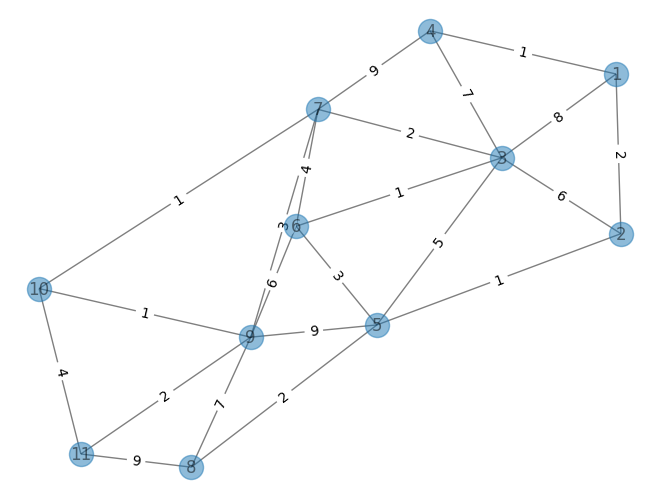

In [1]:
import matplotlib.pyplot as plt  # 导入 Matplotlib 工具包
import networkx as nx  # 导入 NetworkX 工具包

# 问题 2：无向图的最短路问题（司守奎，数学建模算法与应用，P43，例4.3）
G2 = nx.Graph()  # 创建：空的 无向图
G2.add_weighted_edges_from([(1, 2, 2), (1, 3, 8), (1, 4, 1),
                            (2, 3, 6), (2, 5, 1),
                            (3, 4, 7), (3, 5, 5), (3, 6, 1), (3, 7, 2),
                            (4, 7, 9),
                            (5, 6, 3), (5, 8, 2), (5, 9, 9),
                            (6, 7, 4), (6, 9, 6),
                            (7, 9, 3), (7, 10, 1),
                            (8, 9, 7), (8, 11, 9),
                            (9, 10, 1), (9, 11, 2),
                            (10, 11, 4)])  # 向图中添加多条赋权边: (node1,node2,weight)
# 两个指定顶点之间的最短加权路径
minWPath_v1_v11 = nx.dijkstra_path(G2, source=1, target=11)  # 顶点 0 到 顶点 3 的最短加权路径
print("顶点 v1 到 顶点 v11 的最短加权路径: ", minWPath_v1_v11)
# 两个指定顶点之间的最短加权路径的长度
lMinWPath_v1_v11 = nx.dijkstra_path_length(G2, source=1, target=11)  #最短加权路径长度
print("顶点 v1 到 顶点 v11 的最短加权路径长度: ", lMinWPath_v1_v11)

# 关注 Youcans 原创系列（https://www.cnblogs.com/youcans/）
pos = nx.spring_layout(G2)  # 用 FR算法排列节点
nx.draw(G2, pos, with_labels=True, alpha=0.5)
labels = nx.get_edge_attributes(G2, 'weight')
nx.draw_networkx_edge_labels(G2, pos, edge_labels=labels)
plt.show()

顶点 0 到 3 的最短路径为：[0, 3]，最短路径长度为：1
顶点 0 到 3 的最短加权路径为：[0, 4, 3]，最短加权路径长度为：35
城市 0 到 城市 1 机票票价最低的路线为: [0, 5, 1]，票价总和为：35
城市 0 到 城市 2 机票票价最低的路线为: [0, 4, 2]，票价总和为：45
城市 0 到 城市 3 机票票价最低的路线为: [0, 5, 3]，票价总和为：35
城市 0 到 城市 4 机票票价最低的路线为: [0, 4]，票价总和为：25
城市 0 到 城市 5 机票票价最低的路线为: [0, 5]，票价总和为：10


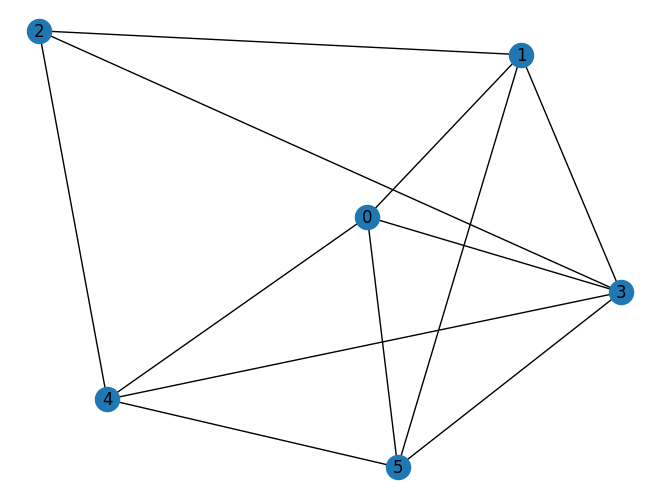

In [2]:
import pandas as pd
import matplotlib.pyplot as plt  # 导入 Matplotlib 工具包
import networkx as nx  # 导入 NetworkX 工具包

# 问题 1：城市间机票价格问题（司守奎，数学建模算法与应用，P41，例4.1）
# # 从Pandas数据格式（顶点邻接矩阵）创建 NetworkX 图
# # from_pandas_adjacency(df, create_using=None) # 邻接矩阵，n行*n列，矩阵数据表示权重
dfAdj = pd.DataFrame([[0, 50, 0, 40, 25, 10],  # 0 表示不邻接，
                      [50, 0, 15, 20, 0, 25],
                      [0, 15, 0, 10, 20, 0],
                      [40, 20, 10, 0, 10, 25],
                      [25, 0, 20, 10, 0, 55],
                      [10, 25, 0, 25, 55, 0]])
G1 = nx.from_pandas_adjacency(dfAdj)  # 由 pandas 顶点邻接矩阵 创建 NetworkX 图

# 计算最短路径：注意最短路径与最短加权路径的不同
# 两个指定顶点之间的最短路径
minPath03 = nx.shortest_path(G1, source=0, target=3)  # 顶点 0 到 顶点 3 的最短路径
lMinPath03 = nx.shortest_path_length(G1, source=0, target=3)  #最短路径长度
print("顶点 0 到 3 的最短路径为：{}，最短路径长度为：{}".format(minPath03, lMinPath03))
# 两个指定顶点之间的最短加权路径
minWPath03 = nx.bellman_ford_path(G1, source=0, target=3)  # 顶点 0 到 顶点 3 的最短加权路径
# 两个指定顶点之间的最短加权路径的长度
lMinWPath03 = nx.bellman_ford_path_length(G1, source=0, target=3)  #最短加权路径长度
print("顶点 0 到 3 的最短加权路径为：{}，最短加权路径长度为：{}".format(minWPath03, lMinWPath03))

for i in range(1, 6):
    minWPath0 = nx.dijkstra_path(G1, source=0, target=i)  # 顶点 0 到其它顶点的最短加权路径
    lMinPath0 = nx.dijkstra_path_length(G1, source=0, target=i)  #最短加权路径长度
    print("城市 0 到 城市 {} 机票票价最低的路线为: {}，票价总和为：{}".format(i, minWPath0, lMinPath0))
nx.draw(G1, with_labels=True, layout=nx.spring_layout(G1))
plt.show()